In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps


# Convexité par déplacement

**T1/**  
Notons $\nu$ la mesure image de $\mu$ par T .  
Par définition de la mesure image on a :   
$\forall f \quad \nu-intégrable  : $ 
$$
\begin{align*}
\int_{\mathbb{R}} f \, d\nu = \int_{\mathbb{R}} (f \circ T) \, d\mu 
&=  \int_{\mathbb{R}} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx \\
&=  \int_{\mathbb{R}^+} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx + \int_{\mathbb{R}^-} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx\\
&\stackrel{Parité}{=}2\int_{\mathbb{R}^+} f(x^2) \cdot \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx \\
&\stackrel{Chgt.var}{=}\int_{\mathbb{R}^+} f(x) \cdot \frac{1}{\sqrt{2\pi x}} \exp(\frac{-x}{2}) dx
\end{align*}
$$

  
Ainsi : $\nu$ est la loi de densité $x \mapsto \frac{1}{\sqrt{2\pi x}} \cdot \exp(\frac{-x}{2}) \mathbf{1}_{\mathbb{R}^+}(x)$    



**S1/**  

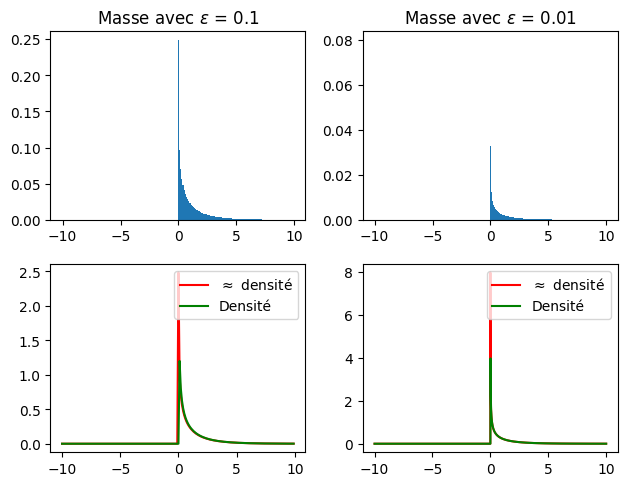

In [8]:
fig,ax=plt.subplots(2,2)
fig.tight_layout()
eps1=0.1
eps2=0.01
seg1=np.arange(-10,10,eps1)
seg2=np.arange(-10,10,eps2)
# Calcul de masse
def mass(a,eps):
    b = a+eps
    if(b<0):
        return 0
    if(a<0):
        a=0
    a=np.sqrt(a)
    b=np.sqrt(b)
    # On multiplie par 2 car il y a deux intervales de même masse
    return 2*(sps.norm.cdf(b)-sps.norm.cdf(a))  
res1 = np.array([mass(i,eps1) for i in seg1])
res2 = np.array([mass(i,eps2) for i in seg2])

dens1 = [i/eps1 for i in res1]
dens2 = [i/eps2 for i in res2]

def funcTheorique(x):
    if(x<=0):
        return 0
    return 1/np.sqrt(2*np.pi*x)*np.exp(-x/2)

theo1 = [funcTheorique(i) for i in seg1]
theo2 = [funcTheorique(i) for i in seg2]
#ax1=plt.subplot(11)
#ax2=plt.subplot(12)
ax[0,0].bar(seg1,res1,width=eps1)
ax[0,0].title.set_text("Masse avec $\epsilon$ = 0.1")
ax[1,0].plot(seg1,dens1,color='red',label=r"$\approx$ densité")
ax[1,0].plot(seg1,theo1,color='green',label=r"Densité")
#plt.ylim([0,0.03])
ax[0,1].bar(seg2,res2,width=eps2)
ax[0,1].title.set_text("Masse avec $\epsilon$ = 0.01")
ax[1,1].plot(seg2,dens2,color='red',label=r"$\approx$ densité")
ax[1,1].plot(seg2,theo2,color='green',label=r"Densité")

ax[1,0].legend(loc="best")
ax[1,1].legend(loc="best")
  

### Interpolation par déplacement

**T2/**  

Posons $T(x):= x+1$  
Pour $A$ mesurable on a :
$$
\begin{align*}
\nu(A) &= \delta_0(T^{-1}(A)) \\
&= \begin{cases}
1 & \text{si } 1 \in A \\
0 & \text{sinon}
\end{cases} \\
&= \delta_1(A)
\end{align*}
$$
Ainsi , $$\nu = \delta_1$$  
L'interpolation par déplacement donne :
$\forall t \in [0,1] \quad \mu_t = T_t \# \mu $  
Donc pour $A$ mesurable on a :
$$
\begin{align*}
\mu_t(A) &= \delta_0(A - t) &\text{car} && T^{-1}(x):=x -t \\
&= \begin{cases}
1 & \text{si } t \in A \\
0 & \text{sinon}
\end{cases} \\
&= \delta_t(A)
\end{align*}
$$  

On remarque que $\tilde{\mu}_t$ est une combinaison convexe de $\delta_0$ et $\delta_1$ alors que $\mu_t$ = $\delta_t$.  
Une illustration pour t=0.2 :



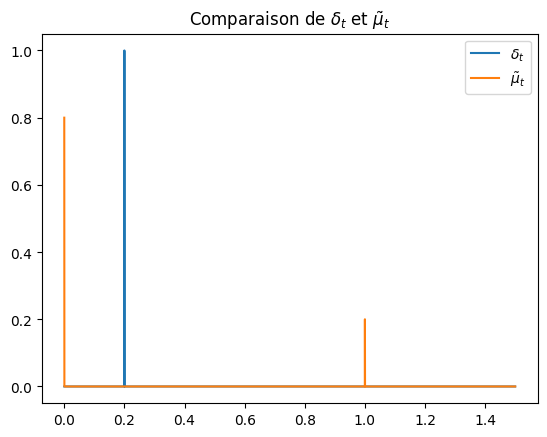

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dirac(t, x):
    return 1 if x == t else 0

def mutilde(t, x):
    if x==0 : return 1-t 
    if x==1 : return t
    return 0



t = 0.2

x_values = np.arange(0,1.5,t/1000)


y_dirac = [dirac(t, x) for x in x_values]


y_custom = [mutilde(t, x) for x in x_values]


plt.plot(x_values, y_dirac, label='$\delta_t$')
plt.plot(x_values, y_custom, label=r'$\tilde{\mu}_t$')



plt.title(r'Comparaison de $\delta_t$ et $\tilde{\mu}_t$')


plt.legend()


plt.show()


**S2/**   

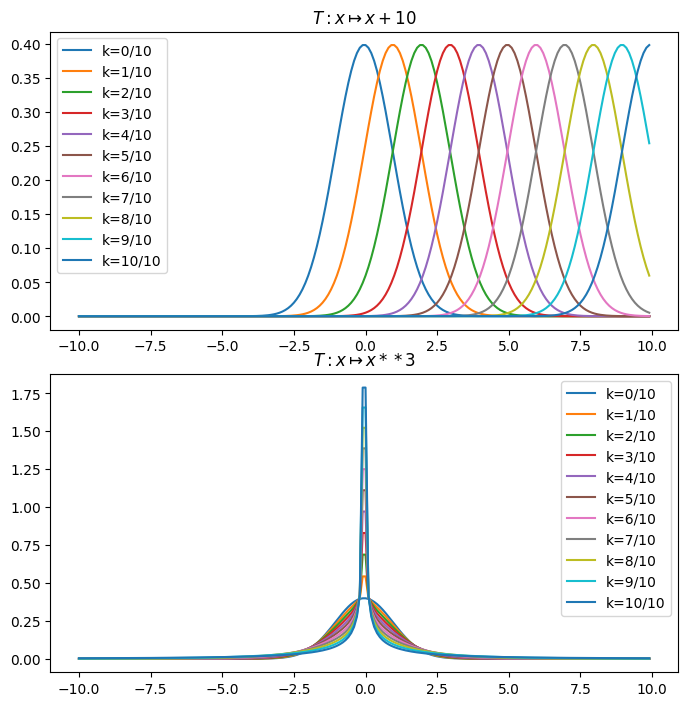

In [4]:
eps=0.1

seg = np.arange(-10,10,eps)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,7))
fig.tight_layout()

def fonctionInverse1(x):
    return x-10
def fonctionInverse2(x):
    if(x<0):
        return -(-x)**(1/3)
    return x**(1/3)

def mass(a,b,inv):
    a = inv(a)
    b = inv(b)
    return (sps.norm.cdf(b)-sps.norm.cdf(a)) 

def Tt(x,t,T):
    return (1-t)*x+t*T(x)

for k in range(0,11):
    res = [mass(i,i+eps,lambda x:Tt(x,k/10,fonctionInverse1))/eps for i in seg]
    ax1.plot(seg,res,label="k="+str(k)+"/10")
ax1.title.set_text("$T : x \mapsto x+10$")

for k in range(0,11):
    res = [mass(i,i+eps,lambda x:Tt(x,k/10,fonctionInverse2))/eps for i in seg]
    ax2.plot(seg,res,label="k="+str(k)+"/10")
ax2.title.set_text("$T : x \mapsto x**3$")
ax1.legend()
ax2.legend()
plt.show()



### Transport Optimal

**T3/**
Soit T une fonction de transport de $\mu$ vers $\nu $ $\\$
On suppose dans cette question que $x\mapsto x.T(x)$  et  $x\mapsto x^2$ sont intégrables par la mesure $\mu$
$\newline$
Ainsi on obtient : 
$$ 
\begin{align*}
C_2(T)^2 &= \int \lvert x-T(x) \rvert^2 d\mu (x) \\
&= \int x^2d\mu (x) + \int T(x)^2 d\mu (x) - \int 2T(x).x.d\mu(x)
\end{align*}
$$
Or d'après la formule du changement de variable, et en posant $g:x\mapsto x^2$ qui est mesurable, $$ $$
On obtient : $ \int T(x)^2 d\mu(x) = \int g\circ T(x)d\mu(x) = \int g(x)d\nu(x) = \int x^2d\nu(x) = cste $ $$ $$
Et : $\int x^2 d\mu(x) = cste $ $$ $$
On obtient : 
$$
C_2(T)^2 = cste - 2.\int x.T(x)d\mu(x)
$$
Finalement : 
$$
\text{Minimiser }C_2(T) \Leftrightarrow \left( \text{Maximiser} \int x.T(x)d\mu(x) \right)
$$

**T5/** Pour simplifier les calculs, on prends les $(y_i)$ distincts deux à deux. (Si on a $y_i=y_j$, on peut les rassembler en un $y_i$ avec $p'_i = p_i+p_j$ et $n=n-1$ ) $ \newline $
On ordonne la suite $ ( y_i ) _{i\in [0,n]}$ avec la permutation $ \sigma \text{.} $ 
On obtient la suite $ ( y_{\sigma(i)} ) _{i\in [0,n]} $ $ \newline $
et on pose $\forall k \in [0,n] \quad  x_k:= \sum_{i=0}^{k} p_{\sigma(i)} \quad \left( x_i \in [0,1] \right) $ 
$ \newline $
on définit la fonction de transport : 
$$
\forall k \in [0,n-1] \quad \forall x \in [x_i,x_{i+1}[ \quad T(x)=y_{\sigma(i)}
$$
Donc pour $\nu = T \# \mu $ : 

$$
\begin{align*}
\forall i \in [1,n] \quad \nu(\{y_i\}) &=\mu\left(T^{-1}(\{y_i\})\right) \\
&=\mu\left( \left[x_{\sigma^{-1}(i)},x_{\sigma^{-1}(i)+1}\right] \right) \\
&=x_{\sigma^{-1}(i)+1}-x_{\sigma^{-1}(i)} \\
&=p_i \\
&=\sum_{k=1}^{n}p_i\delta_{y_i}(\{y_i\})
\end{align*}
$$
et 
$$
\nu(\{x\}) = \nu\left(T^{-1}(\{x\})\right) = \nu(\emptyset) = 0 \quad \text{pour } x \not\in \{y_1,y_2....,y_n\}
//
$$
Finalement : 
$
\nu = \sum_{k=1}^{n}p_i\delta_{y_i}
$
Donc T transport $\mu$ sur$\nu$
$$ \newline $$

Voici un exemple d'une telle

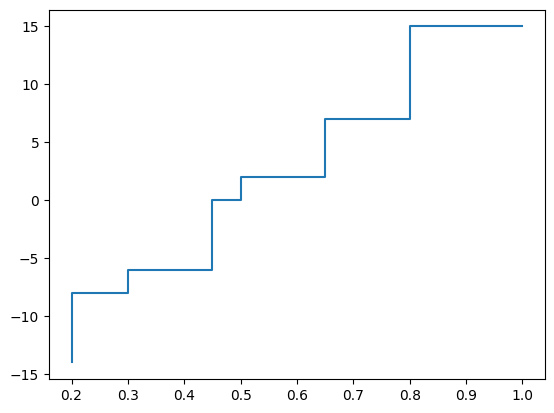

In [11]:
Ysorted = np.array([-14,-8,-6,0,2,7,15])
P = np.array([0.2,0.1,0.15,0.05,0.15,0.15,0.2])
X = np.cumsum(P)
plt.step(X,Ysorted)
plt.show()

#### Lemme : Inégalité de réordonnement  
Soient $(a_1, \ldots, a_n)$ et $(b_1, \ldots, b_n)$ $(n \in \mathbb{N}, n \geq 2)$ des réels tels que $a_1 \leq \ldots \leq a_n$ et $b_1 \leq \ldots \leq b_n$. Alors,

$$\forall \sigma \in S_n, \quad \sum_{i=1}^{n} a_i b_{\sigma(i)} \leq \sum_{i=1}^{n} a_i b_i
$$

***Preuve:***  

Montrons d’abord le cas $n = 2$.  
Soient $(a_1, a_2) \in \mathbb{R}^2$ et $(b_1, b_2) \in \mathbb{R}^2$, avec $a_1 \leq a_2$ et $b_1 \leq b_2$. Alors,
$(a_2 - a_1)(b_2 - b_1) \geq 0 \Leftrightarrow a_2b_2 - a_1b_2 - a_2b_1 + a_1b_1 \geq 0 \Leftrightarrow a_1b_1 + a_2b_2 \geq a_1b_2 + a_2b_1$   


Hérédité:  
Soit $n \in \mathbb{N}$ tel que $n \ge 3 $. Supposons la proposition vraie pour $n-1$.

Considérons maintenant $x_1 \le \cdots \le x_n$ et $y_1 \le \cdots \le y_n$. Prenons une permutation $\sigma \in S_n$ . 
Il y a deux cas :

* Si $\sigma(n)=n$, alors $y_n=y_{\sigma(n)}$ et, en utilisant l'hypothèse de récurrence, l'inégalité est vérifiée.  
* Si $j := \sigma(n) < n$, alors il existe un $j\in\{1,\dots,n-1\}$ tel que $\sigma(k)=n$. 
  $$a_1b_{\sigma(1)} + \ldots + a_kb_n + \ldots + a_{n}b_j \leq a_1b_{\sigma(1)} + \ldots + a_kb_j + \ldots + a_{n}b_{n} \stackrel{Rec}{\leq} \sum_{i=1}^{n}a_ib_i$$ 
  La dérnière inégalité obtenue en appliquant l'hypothèse de récurrence sur $x_1 \le \cdots \le x_{n-1}$ et $y_1 \le \cdots \le y_{n-1}$ et la sous permutation sur ${1,\ldots,n-1}$ de  
$\tau(i)=\begin{cases}\sigma(i)&\text{pour }i \in \{1,\ldots,n\}\setminus\{k,n\},\\
j&\text{pour }i = k,\\
n&\text{pour }i = n,\end{cases}$ qui provient de $\sigma$ en échangeant les valeurs de $j$ et $n$.   
On obtient ainsi l'inégalité de reordonnement.


